Epoch 1/500
8/8 - 1s - loss: 0.2865 - mean_absolute_percentage_error: 154.0555 - val_loss: 1.2577 - val_mean_absolute_percentage_error: 138.6431 - 1s/epoch - 127ms/step
Epoch 2/500
8/8 - 0s - loss: 0.0980 - mean_absolute_percentage_error: 106.5867 - val_loss: 0.6576 - val_mean_absolute_percentage_error: 97.2130 - 47ms/epoch - 6ms/step
Epoch 3/500
8/8 - 0s - loss: 0.0305 - mean_absolute_percentage_error: 135.5362 - val_loss: 0.3641 - val_mean_absolute_percentage_error: 69.3578 - 45ms/epoch - 6ms/step
Epoch 4/500
8/8 - 0s - loss: 0.0236 - mean_absolute_percentage_error: 166.7000 - val_loss: 0.2715 - val_mean_absolute_percentage_error: 58.6859 - 44ms/epoch - 5ms/step
Epoch 5/500
8/8 - 0s - loss: 0.0188 - mean_absolute_percentage_error: 143.6088 - val_loss: 0.2452 - val_mean_absolute_percentage_error: 56.0215 - 45ms/epoch - 6ms/step
Epoch 6/500
8/8 - 0s - loss: 0.0119 - mean_absolute_percentage_error: 102.7136 - val_loss: 0.2375 - val_mean_absolute_percentage_error: 55.7775 - 45ms/epoch - 

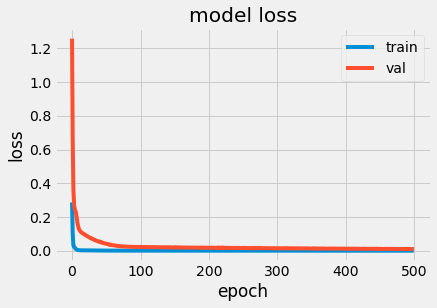

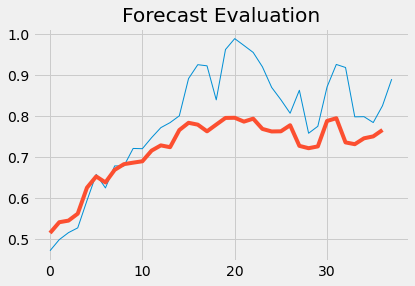

confidence verification data saved as pickle files: static\past_preds.pickle and static\past_test.pickle


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import pickle
plt.style.use('fivethirtyeight')
df=pd.read_csv('data/portfolio_data.csv')
series=np.array(df['DPZ'])
from univariate.rnn_univariate import univariate_ts_rnn
model=univariate_ts_rnn(epochs=500)
model,past_test_val,past_preds=model.train(data=series)

static_folder = "static"

# Create the static folder if it doesn't exist
if not os.path.exists(static_folder):
    os.makedirs(static_folder)

# File path for the pickle file
past_test_pickle_file_path = os.path.join(static_folder, "past_test.pickle")
with open(past_test_pickle_file_path, "wb") as f:
    pickle.dump(past_test_val, f)

past_preds_pickle_file_path = os.path.join(static_folder, "past_preds.pickle")
with open(past_preds_pickle_file_path, "wb") as f:
    pickle.dump(past_preds, f)

print("confidence verification data saved as pickle files: {} and {}".format(past_preds_pickle_file_path,past_test_pickle_file_path))

In [3]:
df=pd.read_csv('data/portfolio_data.csv')
series=np.array(df['DPZ'])

Epoch 1/100
8/8 - 1s - loss: 0.2470 - mean_absolute_percentage_error: 150.9829 - val_loss: 1.0156 - val_mean_absolute_percentage_error: 125.1836 - 972ms/epoch - 121ms/step
Epoch 2/100
8/8 - 0s - loss: 0.0836 - mean_absolute_percentage_error: 123.5692 - val_loss: 0.5047 - val_mean_absolute_percentage_error: 85.7192 - 45ms/epoch - 6ms/step
Epoch 3/100
8/8 - 0s - loss: 0.0303 - mean_absolute_percentage_error: 150.3784 - val_loss: 0.2741 - val_mean_absolute_percentage_error: 61.0365 - 44ms/epoch - 6ms/step
Epoch 4/100
8/8 - 0s - loss: 0.0240 - mean_absolute_percentage_error: 162.4876 - val_loss: 0.1997 - val_mean_absolute_percentage_error: 51.1558 - 44ms/epoch - 6ms/step
Epoch 5/100
8/8 - 0s - loss: 0.0166 - mean_absolute_percentage_error: 129.4440 - val_loss: 0.1847 - val_mean_absolute_percentage_error: 49.3509 - 45ms/epoch - 6ms/step
Epoch 6/100
8/8 - 0s - loss: 0.0099 - mean_absolute_percentage_error: 80.1423 - val_loss: 0.1807 - val_mean_absolute_percentage_error: 49.1601 - 42ms/epoch 

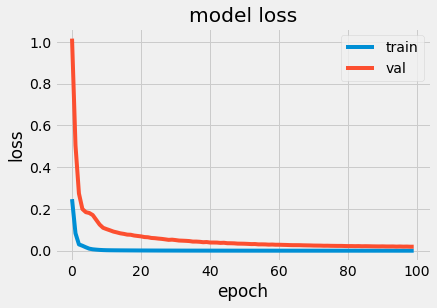

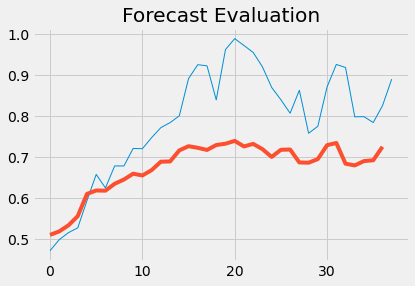

In [7]:
from univariate.rnn_univariate import univariate_ts_rnn
model=univariate_ts_rnn(epochs=100)
test_val,preds=model.train(data=series)


In [8]:
test_val

array([[0.47113671],
       [0.49816163],
       [0.51526143],
       [0.52689695],
       [0.59355296],
       [0.65745149],
       [0.62440329],
       [0.67823161],
       [0.67803182],
       [0.72084664],
       [0.72028574],
       [0.74728555],
       [0.77168142],
       [0.78393939],
       [0.8005238 ],
       [0.89154282],
       [0.92542054],
       [0.9226509 ],
       [0.83956199],
       [0.96242938],
       [0.98908215],
       [0.97234382],
       [0.95535785],
       [0.92016788],
       [0.86993675],
       [0.83981407],
       [0.80687619],
       [0.86297904],
       [0.75796593],
       [0.77497509],
       [0.87114502],
       [0.92600155],
       [0.9185853 ],
       [0.79807038],
       [0.79843605],
       [0.78412987],
       [0.82502783],
       [0.8901736 ]])

In [9]:
preds

array([0.50974077, 0.5183548 , 0.53319633, 0.5555871 , 0.6097182 ,
       0.6182309 , 0.61772543, 0.6345681 , 0.6449437 , 0.65919375,
       0.6548614 , 0.6679028 , 0.68846226, 0.68909425, 0.71611154,
       0.72637045, 0.72239614, 0.7172381 , 0.72918624, 0.7324642 ,
       0.7393347 , 0.7257738 , 0.7320054 , 0.7191998 , 0.7001376 ,
       0.71761745, 0.71819425, 0.68667316, 0.68603194, 0.694919  ,
       0.728847  , 0.7342188 , 0.68361473, 0.6794436 , 0.690016  ,
       0.6920087 , 0.7249167 ], dtype=float32)